In [14]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset
import CNN_RAVDESS

In [12]:
# interfacce function to get splited dataset
dataset_collection = dataset.getMFCCDatasetRAVDESS(train_size = 0.6, valid_size = 0.2, test_size = 0.2)

X_train = dataset_collection['X_train']
Y_train = dataset_collection['Y_train']
X_valid = dataset_collection['X_valid']
Y_valid = dataset_collection['Y_valid']
X_test = dataset_collection['X_test']
Y_test = dataset_collection['Y_test']

X_train_norm = dataset_collection['X_train_norm']
X_valid_norm = dataset_collection['X_valid_norm']
X_test_norm = dataset_collection['X_test_norm']

In [13]:
print(X_train.shape)

(862, 1024, 19)


In [4]:
# convert array to tensor
X_train_norm = tf.convert_to_tensor(X_train_norm)
X_valid_norm = tf.convert_to_tensor(X_valid_norm)
X_test_norm = tf.convert_to_tensor(X_test_norm)
Y_train = tf.convert_to_tensor(Y_train)
Y_valid = tf.convert_to_tensor(Y_valid)
Y_test = tf.convert_to_tensor(Y_test)

X_train = tf.convert_to_tensor(X_train)
X_valid = tf.convert_to_tensor(X_valid)
X_test = tf.convert_to_tensor(X_test)

In [5]:
def convolutional_model(input_shape):
        """
        Implements the forward propagation for the model:
        CONV2D -> RELU -> MAXPOOL -> CONV2D -> Softmax -> MAXPOOL -> FLATTEN -> DENSE
        
        Arguments:
        input_mfcc -- input dataset, of shape (input_shape)

        Returns:
        model -- TF Keras model (object containing the information for the entire training process) 
        """

        input_mfcc = tf.keras.Input(shape=input_shape)
        ## CONV1D: 4 filters 8, stride of 1, padding 'SAME'
        Z1 = tfl.Conv1D(filters = 8, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(input_mfcc)
        ## RELU
        A1 = tfl.ReLU()(Z1)
        ## MAXPOOL: window 8, stride 4, padding 'SAME'
        P1 = tfl.MaxPool1D(pool_size = 8, strides = 4, padding='same')(A1)
        
        ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
        Z2 = tfl.Conv1D(filters = 4, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(P1)
        ## RELU
        A2 = tfl.Softmax()(Z2)
        ## MAXPOOL: window 4, stride 2, padding 'SAME'
        P2 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A2)

        # ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
        # Z3 = tfl.Conv1D(filters = 2, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(P2)
        # ## RELU
        # A3 = tfl.Softmax()(Z3)
        # ## MAXPOOL: window 4, stride 2, padding 'SAME'
        # P3 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A3)

        ## FLATTEN
        F = tfl.Flatten()(P2)
        ## Dense layer
        ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
        outputs = tfl.Dense(8, activation='softmax')(F)
        
        model = tf.keras.Model(inputs=input_mfcc, outputs=outputs)
        return model


In [7]:
# conv_model = CNN_RAVDESS.CNN.convolutional_model((512, 19))
conv_model = convolutional_model((1500, 19))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1024, 19)]        0         
                                                                 
 conv1d_2 (Conv1D)           (None, 512, 8)            616       
                                                                 
 re_lu_1 (ReLU)              (None, 512, 8)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 128, 8)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 64, 4)             132       
                                                                 
 softmax_1 (Softmax)         (None, 64, 4)             0         
                                                           

In [8]:
print(X_train_norm)

tf.Tensor(
[[[ 8.65452830e-03 -1.97749659e-01 -3.19850028e-01 ...  5.80580309e-02
    2.13445485e-01 -2.49998242e-01]
  [-1.50959492e-01 -6.92460090e-02 -4.15483594e-01 ...  7.05824327e-03
    6.53833896e-02 -4.82243747e-01]
  [-8.48899662e-01  5.10343350e-02 -3.53097618e-01 ... -1.00505099e-01
    9.57922116e-02 -5.75348854e-01]
  ...
  [ 5.96901953e-01 -1.34495616e+00  1.61736846e-01 ...  4.94632214e-01
   -4.65513945e-01  9.17943940e-02]
  [ 3.15073818e-01 -9.44528401e-01 -2.65422068e-03 ...  5.59695184e-01
   -4.35795158e-01 -1.28358826e-02]
  [ 1.32627279e-01 -3.32989931e-01 -3.98049831e-01 ...  4.01273608e-01
   -3.33798945e-01  7.81598780e-03]]

 [[-1.26203075e-01 -1.50998735e+00 -1.46991360e+00 ...  2.84767658e-01
    2.24770308e-01 -1.91556185e-01]
  [-1.19842000e-01 -1.51998603e+00 -1.71362269e+00 ...  1.88951135e-01
    3.85100156e-01 -4.10572052e-01]
  [-2.97670603e-01 -1.51068139e+00 -1.68830192e+00 ...  1.89094737e-01
    4.92966682e-01 -4.94944960e-01]
  ...
  [ 5.800567

In [9]:
history = conv_model.fit(X_train_norm, Y_train, epochs=500, validation_data=(X_valid_norm, Y_valid))

Epoch 1/500
27/27 [==============================] - 6s 40ms/step - loss: 3.1812 - accuracy: 0.1346 - val_loss: 3.0852 - val_accuracy: 0.1368
Epoch 2/500
27/27 [==============================] - 1s 20ms/step - loss: 3.0343 - accuracy: 0.1613 - val_loss: 2.9830 - val_accuracy: 0.1333
Epoch 3/500
27/27 [==============================] - 1s 19ms/step - loss: 2.9240 - accuracy: 0.1798 - val_loss: 2.8882 - val_accuracy: 0.1439
Epoch 4/500
27/27 [==============================] - 1s 19ms/step - loss: 2.8241 - accuracy: 0.1914 - val_loss: 2.7994 - val_accuracy: 0.1649
Epoch 5/500
27/27 [==============================] - 1s 21ms/step - loss: 2.7320 - accuracy: 0.1914 - val_loss: 2.7140 - val_accuracy: 0.1719
Epoch 6/500
27/27 [==============================] - 1s 20ms/step - loss: 2.6446 - accuracy: 0.1984 - val_loss: 2.6397 - val_accuracy: 0.1860
Epoch 7/500
27/27 [==============================] - 1s 21ms/step - loss: 2.5727 - accuracy: 0.2227 - val_loss: 2.5747 - val_accuracy: 0.1930
Epoch 

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

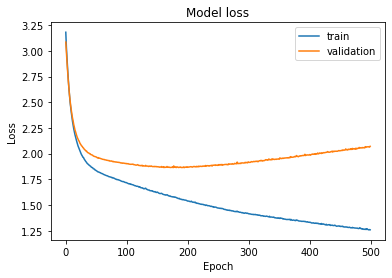

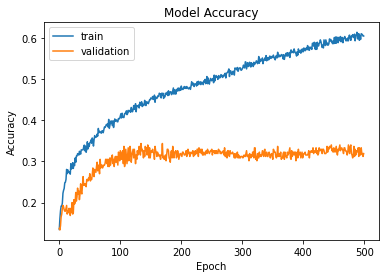

In [10]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')